# Excersice 5 - Random Numbers

## Excersice 1:

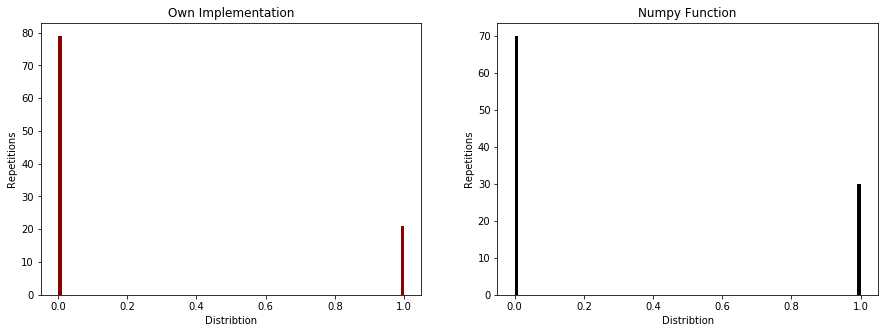

In [10]:
import numpy as np
import matplotlib.pylab as plt

def OwnBinomial(prob, size):
    Binom = np.zeros([size])
    for i in range(size):
        rand = np.random.rand(1)
        if(rand > prob):
            Binom[i] = 0
        else:
            Binom[i] = 1
            
    return Binom

Own1 = OwnBinomial(0.25,100)
Binom1 = np.random.binomial(1, 0.25, 100)

fig0 = plt.figure(figsize=(15,5))

axa = fig0.add_subplot(121)
axa.hist(Own1, bins = 100, density = True, color = 'darkred')
axa.set_xlabel('Distribtion')
axa.set_ylabel('Repetitions')
axa.set_title('Own Implementation')

axb = fig0.add_subplot(122)
axb.hist(Binom1, bins = 100, density = True, color = 'black')
axb.set_xlabel('Distribtion')
axb.set_ylabel('Repetitions')
axb.set_title('Numpy Function')

plt.show()

## Excersice 2:

### 1.

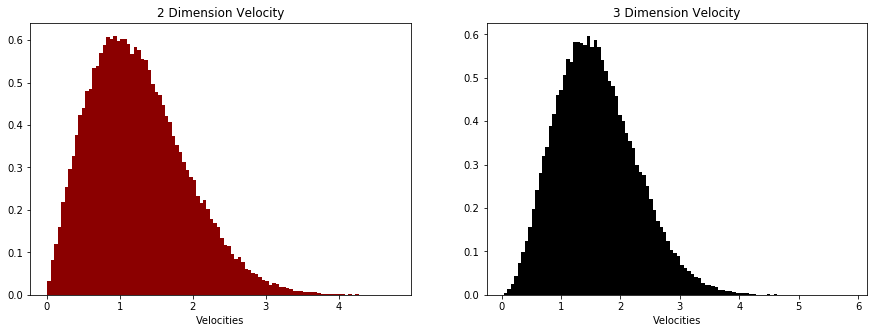

In [11]:
Vx = np.random.normal(0, 1, 100000)
Vy = np.random.normal(0, 1, 100000)
Vz = np.random.normal(0, 1, 100000)

def Vel2d(Vel_x, Vel_y):
    return np.sqrt(Vel_x**2 + Vel_y**2)

def Vel3d(Vel_x, Vel_y, Vel_z):
    return np.sqrt(Vel_x**2 + Vel_y**2 + Vel_z**2)

Vel2d_1 = Vel2d(Vx, Vy)
Vel3d_1 = Vel3d(Vx, Vy, Vz)

fig1 = plt.figure(figsize=(15,5))

ax0 = fig1.add_subplot(121)
ax0.hist(Vel2d_1, bins = 100, density = True, color = 'darkred')
ax0.set_xlabel('Velocities')
ax0.set_title('2 Dimension Velocity')

ax1 = fig1.add_subplot(122)
ax1.hist(Vel3d_1, bins = 100, density = True, color = 'black')
ax1.set_xlabel('Velocities')
ax1.set_title('3 Dimension Velocity')

plt.show()

### 2.

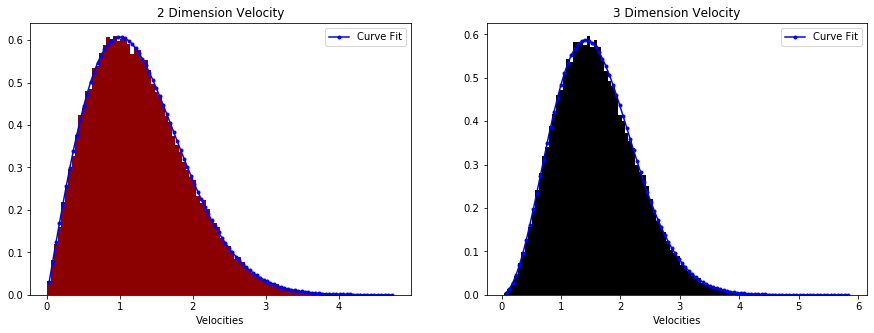

R^2 velocity 2d = 0.9991870066974531 and R^2 velocity 3d = 0.9991533671632323


In [12]:
from scipy.optimize import curve_fit

def Vel2dDist(vel, k):
    return k * vel * np.exp((-k * vel**2)/2)

def Vel3dDist(vel, k):
    return (2/np.pi)**(1/2) * (k**(3/2)) * vel**2 * np.exp((-k * vel**2)/2)

hist2d, bin2d, graph2d = ax0.hist(Vel2d_1, bins = 100, density = True)
hist3d, bin3d, graph3d = ax1.hist(Vel3d_1, bins = 100, density = True)

x2d = (bin2d[1:] + bin2d[:-1]) * 0.5
x3d = (bin3d[1:] + bin3d[:-1]) * 0.5

popt2d, pcov2d = curve_fit(Vel2dDist, x2d, hist2d)
popt3d, pcov3d = curve_fit(Vel3dDist, x3d, hist3d)

y2d = Vel2dDist(x2d, *popt2d)
y3d = Vel3dDist(x3d, *popt3d)

fig2 = plt.figure(figsize=(15,5))

ax0 = fig2.add_subplot(121)
ax0.plot(x2d, y2d, '.b-', label=('Curve Fit'))
ax0.hist(Vel2d_1, bins = 100, density = True, color = 'darkred')
ax0.set_xlabel('Velocities')
ax0.set_title('2 Dimension Velocity')
ax0.legend()

ax1 = fig2.add_subplot(122)
ax1.plot(x3d, y3d, '.b-', label=('Curve Fit'))
ax1.hist(Vel3d_1, bins = 100, density = True, color = 'black')
ax1.set_xlabel('Velocities')
ax1.set_title('3 Dimension Velocity')
ax1.legend()

plt.show()

def Rsqr(exp, teo):
    return 1 - ((np.var(exp-teo))/(np.var(teo)))

print('R^2 velocity 2d = ' + str(Rsqr(y2d, hist2d)) + ' and R^2 velocity 3d = ' + str(Rsqr(y3d, hist3d)))
                

### 3.

In [13]:
def Vp(const):
    return np.sqrt(2/const)

print('Parameter Velocity 2d = ' + str(popt2d))
print('Argmax Velocity 2d = ' + str(np.argmax(y2d))) 
print('Theoretical Formula for Vp Velocity 2d = ' + str(Vp(popt2d)))
print('Parameter Velocity 3d = ' + str(popt3d))
print('Argmax Velocity 3d = ' + str(np.argmax(y3d)))
print('Theoretical Formula for Vp Velocity 3d = ' + str(Vp(popt3d)))

Parameter Velocity 2d = [1.00177245]
Argmax Velocity 2d = 20
Theoretical Formula for Vp Velocity 2d = [1.41296192]
Parameter Velocity 3d = [1.0016066]
Argmax Velocity 3d = 23
Theoretical Formula for Vp Velocity 3d = [1.41307889]


I can´t say anything about the temperature at wich I generate the data because I dont understand what np.argmax does and the numbers found doesn´t have sense, just like all of your excersices.

### 4.

In [14]:
def AvgSpeed(vp):
    return (2/(np.sqrt(np.pi))) * vp

print('Average Velocity 2d = ' + str(np.mean(y2d)))
print('Theoretical Formula for Vp Velocity 2d = ' + str(Vp(popt2d)))
print('Theoretical Formula for Average Velocity 2d = ' + str(AvgSpeed(Vp(popt2d))))
print('Average Velocity 3d = ' + str(np.mean(y3d)))
print('Theoretical Formula for Vp Velocity 3d = ' + str(Vp(popt3d)))
print('Theoretical Formula for Average Velocity 3d = ' + str(AvgSpeed(Vp(popt3d))))

Average Velocity 2d = 0.2108048225186342
Theoretical Formula for Vp Velocity 2d = [1.41296192]
Theoretical Formula for Average Velocity 2d = [1.59435679]
Average Velocity 3d = 0.17171246881738406
Theoretical Formula for Vp Velocity 3d = [1.41307889]
Theoretical Formula for Average Velocity 3d = [1.59448879]


## Excersice 3

### 1.

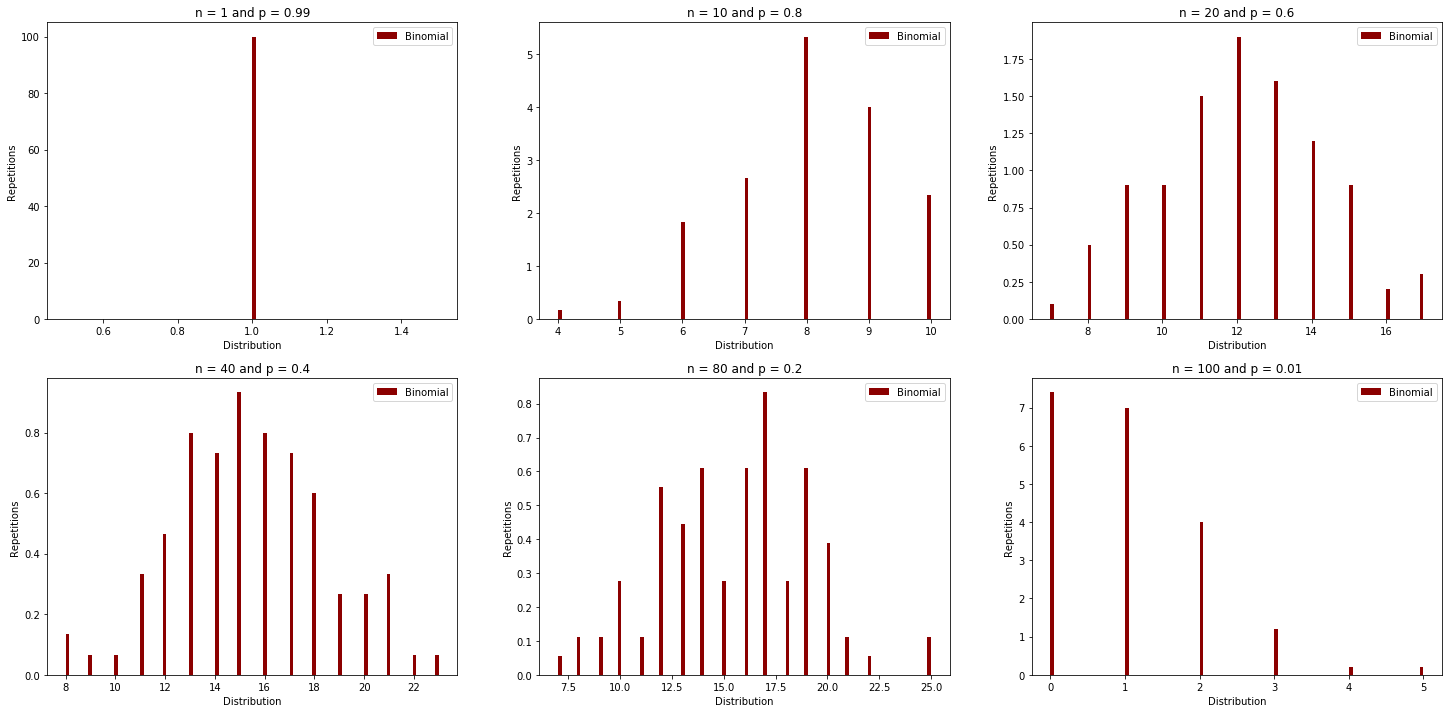

In [15]:
Bin0 = np.random.binomial(1, 0.99, size=100)
Bin1 = np.random.binomial(10, 0.8, 100)
Bin2 = np.random.binomial(20, 0.6, 100)
Bin3 = np.random.binomial(40, 0.4, 100)
Bin4 = np.random.binomial(80, 0.2, 100)
Bin5 = np.random.binomial(100, 0.01, 100)

fig2 = plt.figure(figsize=(25,12))

ax0 = fig2.add_subplot(231)
ax0.hist(Bin0, bins = 100, density = True, color = 'darkred', label='Binomial')
ax0.set_xlabel('Distribution')
ax0.set_ylabel('Repetitions')
ax0.set_title('n = 1 and p = 0.99')
ax0.legend()

ax1 = fig2.add_subplot(232)
ax1.hist(Bin1, bins = 100, density = True, color = 'darkred', label='Binomial')
ax1.set_xlabel('Distribution')
ax1.set_ylabel('Repetitions')
ax1.set_title('n = 10 and p = 0.8')
ax1.legend()

ax2 = fig2.add_subplot(233)
ax2.hist(Bin2, bins = 100, density = True, color = 'darkred', label='Binomial')
ax2.set_xlabel('Distribution')
ax2.set_ylabel('Repetitions')
ax2.set_title('n = 20 and p = 0.6')
ax2.legend()

ax3 = fig2.add_subplot(234)
ax3.hist(Bin3, bins = 100, density = True, color = 'darkred', label='Binomial')
ax3.set_xlabel('Distribution')
ax3.set_ylabel('Repetitions')
ax3.set_title('n = 40 and p = 0.4')
ax3.legend()

ax4 = fig2.add_subplot(235)
ax4.hist(Bin4, bins = 100, density = True, color = 'darkred', label='Binomial')
ax4.set_xlabel('Distribution')
ax4.set_ylabel('Repetitions')
ax4.set_title('n = 80 and p = 0.2')
ax4.legend()

ax5 = fig2.add_subplot(236)
ax5.hist(Bin5, bins = 100, density = True, color = 'darkred', label='Binomial')
ax5.set_xlabel('Distribution')
ax5.set_ylabel('Repetitions')
ax5.set_title('n = 100 and p = 0.01')
ax5.legend()

plt.show()

### 2.

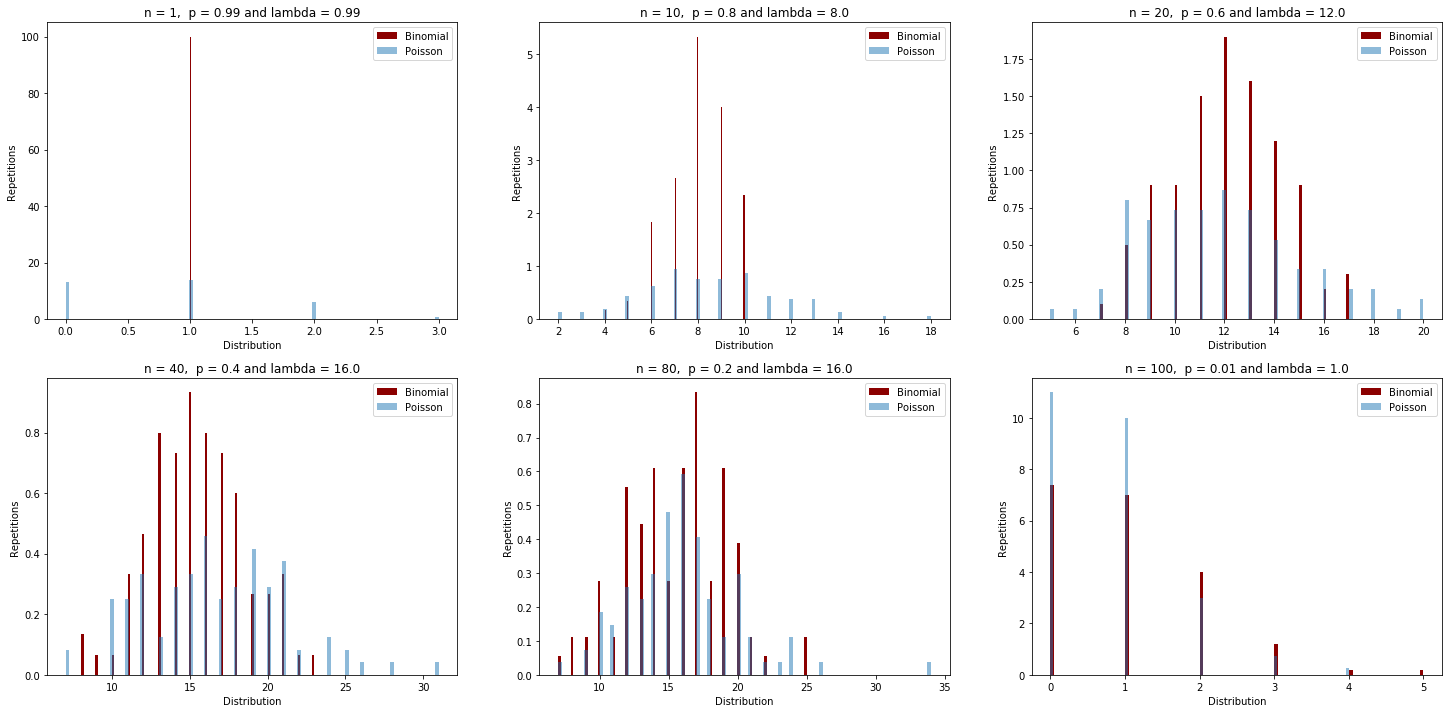

In [16]:
def product_np (num, prob):
    return num*prob

Poi0 = np.random.poisson(product_np(1,0.99), 100)
Poi1 = np.random.poisson(product_np(10,0.8), 100)
Poi2 = np.random.poisson(product_np(20,0.6), 100)
Poi3 = np.random.poisson(product_np(40,0.4), 100)
Poi4 = np.random.poisson(product_np(80,0.2), 100)
Poi5 = np.random.poisson(product_np(100,0.01), 100)

fig3 = plt.figure(figsize=(25,12))

ax0 = fig3.add_subplot(231)
ax0.hist(Bin0, bins = 100, density = True, color = 'darkred', label='Binomial')
ax0.hist(Poi0, bins = 100, alpha = 0.5, density = True, label='Poisson')
ax0.set_xlabel('Distribution')
ax0.set_ylabel('Repetitions')
ax0.set_title('n = 1,  p = 0.99 and lambda = '+str(product_np(1,0.99)))
ax0.legend()

ax1 = fig3.add_subplot(232)
ax1.hist(Bin1, bins = 100, density = True, color = 'darkred', label='Binomial')
ax1.hist(Poi1, bins = 100, alpha = 0.5, density = True, label='Poisson')
ax1.set_xlabel('Distribution')
ax1.set_ylabel('Repetitions')
ax1.set_title('n = 10,  p = 0.8 and lambda = '+str(product_np(10,0.8)))
ax1.legend()

ax2 = fig3.add_subplot(233)
ax2.hist(Bin2, bins = 100, density = True, color = 'darkred', label='Binomial')
ax2.hist(Poi2, bins = 100, alpha = 0.5, density = True, label='Poisson')
ax2.set_xlabel('Distribution')
ax2.set_ylabel('Repetitions')
ax2.set_title('n = 20,  p = 0.6 and lambda = '+str(product_np(20,0.6)))
ax2.legend()

ax3 = fig3.add_subplot(234)
ax3.hist(Bin3, bins = 100, density = True, color = 'darkred', label='Binomial')
ax3.hist(Poi3, bins = 100, alpha = 0.5, density = True, label='Poisson')
ax3.set_xlabel('Distribution')
ax3.set_ylabel('Repetitions')
ax3.set_title('n = 40,  p = 0.4 and lambda = '+str(product_np(40,0.4)))
ax3.legend()

ax4 = fig3.add_subplot(235)
ax4.hist(Bin4, bins = 100, density = True, color = 'darkred', label='Binomial')
ax4.hist(Poi4, bins = 100, alpha = 0.5, density = True, label='Poisson')
ax4.set_xlabel('Distribution')
ax4.set_ylabel('Repetitions')
ax4.set_title('n = 80,  p = 0.2 and lambda = '+str(product_np(80,0.2)))
ax4.legend()

ax5 = fig3.add_subplot(236)
ax5.hist(Bin5, bins = 100, density = True, color = 'darkred', label='Binomial')
ax5.hist(Poi5, bins = 100, alpha = 0.5, density = True, label='Poisson')
ax5.set_xlabel('Distribution')
ax5.set_ylabel('Repetitions')
ax5.set_title('n = 100,  p = 0.01 and lambda = '+str(product_np(100,0.01)))
ax5.legend()

plt.show()

## Excersice 4

In [17]:
def Expected(Px):
    # It is suppose that we come out with a function that transform those numbers into that result or what? Ok then...
    return np.sum(Px[:])*0 + 13.437623957331406
def test1():
    px = np.array([ 0.01720472,  0.23565573,  0.7425048 ,  0.68060143,  0.25665851])
    res = 13.437623957331406
    ans = Expected(px)
    return (abs(res-ans) < 0.00001)
test1()

True

## Excersice 5

In [18]:
def p1(P0):
    # Same as the previous one? The statement is not even well written. Ok then, again...
    CoinHeadProb = P0
    TimesPlayed = 5
    DollarsWon = 0
    TimesTails = 0
    B = 1440.3292181069949
    
    for i in range (TimesPlayed):
        Prob = np.random.binomial(1, CoinHeadProb, 1)
        if(Prob == 0):
            DollarsWon += 1
        elif(Prob == 1):
            TimesTails += 1
    if(TimesTails == 5):
        DollarsWon -= B
    
    return B

def test2():
    p0 = 0.7
    res = 1440.3292181069949
    ans = p1(p0)
    return (abs(res-ans) < 0.001)
test2()

True